# Regresión Logísitica
---


La regresión logísitica es un modelo que puede predecir la probabilidad que tiene una variable binaria (que puede aceptar 2 valores) de pertenecer a una clase o a otra.  

Es por tanto un método utilizado para la clasificación categórica de variables, especialmente útil por su simplicidad e interpretabilidad

## Escenario del problema
---

Una empresa de coches ha sacado un nuevo modelo al mercado. Le ha preguntado a una re  
¡Vamos a ello!

In [2]:
! pip install beautifultable


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [30]:
# 1. Importar librerías
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from beautifultable import BeautifulTable as BT

from sklearn.model_selection import train_test_split as separar
from sklearn.preprocessing import MinMaxScaler

In [31]:
# 2. Importar datos
datos = pd.read_csv('4.2.Compras.csv')
datos.head(10)

,Identificador,Sexo,Edad,Salario,Compra
0,15624510,Hombre,19,19000,0
1,15810944,Hombre,35,20000,0
2,15668575,Mujer,26,43000,0
3,15603246,Mujer,27,57000,0
4,15804002,Hombre,19,76000,0
5,15728773,Hombre,27,58000,0
6,15598044,Mujer,27,84000,0
7,15694829,Mujer,32,150000,1
8,15600575,Hombre,25,33000,0
9,15727311,Mujer,35,65000,0


In [32]:
# 3. Crear variable y respuesta
X = datos.iloc[:,2:-1].values
y = datos['Compra'].values

In [33]:
# 4. Variables categóricas! --> Encode
'''
from sklearn.preprocessing import LabelEncoder
enconder = LabelEncoder()
X[:,0] = enconder.fit_transform(X[:,0])
'''
dataframe = pd.DataFrame(X)
dataframe.head()

,0,1
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000


In [34]:
# 4. Separar en Entranamiento y Validación
X_train, X_test, y_train, y_test = separar(X, y, test_size=0.25, random_state=0)
print('La forma de X_train es: ', X_train.shape)
print('La forma de y_train es: ', y_train.shape)
print('La forma de X_test es: ', X_test.shape)
print('La forma de y_test es: ', y_test.shape)

La forma de X_train es:  (300, 2)
La forma de y_train es:  (300,)
La forma de X_test es:  (100, 2)
La forma de y_test es:  (100,)


In [35]:
# 5. Escalar los datos
escaladorX = MinMaxScaler()
X_train = escaladorX.fit_transform(X_train.astype('float64'))
X_test  = escaladorX.transform(X_test.astype('float64'))
X_test[:5,:]

array([[0.28571429, 0.53333333],
       [0.47619048, 0.25925926],
       [0.4047619 , 0.44444444],
       [0.28571429, 0.47407407],
       [0.4047619 , 0.25925926]])

In [36]:
# 6. Ajustar el Modelo
from sklearn.linear_model import LogisticRegression as LR
clasificador = LR(random_state=0)
clasificador.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [37]:
# 7. Hacer las predicciones
#y_fit = clasificador.predict(X_train)
y_pred = clasificador.predict(X_test)

In [38]:
# 8. Crear la Matriz de Confusión para evaluar la clasificación realizada
from sklearn.metrics import confusion_matrix as CM
cm = CM(y_test, y_pred)
cm

array([[67,  1],
       [10, 22]], dtype=int64)

In [39]:
# 8.1 Otras métricas para evaluar el modelo

# Primero se convierte la matriz de confusión en variables para facilitar su cálculo
tp, fp, fn, tn = cm.ravel()

# Accuracy
accuracy = (tp+tn) / (tp+tn+fp+fn)
print(f"La exactitud/accuracy es de: {accuracy}")

# Precision
precision = tp / (tp+fp)
print(f"La precisión es de: {precision}")

# Recall
recall = tp / (tp+fn)
print(f"La sensibilidad/recall es de: {recall}")

# Specificity
specificity = tn / (tn+fp)
print(f"La especificidad/specificity es de: {specificity}")

# F1 score
f1 = 2 * (precision * recall) / (precision + recall)
print(f"La f1 score es de: {f1}")

La exactitud/accuracy es de: 0.89
La precisión es de: 0.9852941176470589
La sensibilidad/recall es de: 0.8701298701298701
La especificidad/specificity es de: 0.9565217391304348
La f1 score es de: 0.9241379310344828


Interpretación:
- El modelo ha interpretado correctamente el 89% de las predicciones
- De las predicciones que el modelo ha interpretado como verdaderas, ha acertado en el 98,52% de ellas
- De todos los positivos reales que hay, el modelo ha identificado bien el 87,01% de ellos
- De todos los negativos que hay, el modelo ha identificado bien el 95,65% de ellos
- El F1 Score es del 92,41%, indicando esto que el modelo es robusto y hay un buen equilibrio entre precisión y sensibilidad

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


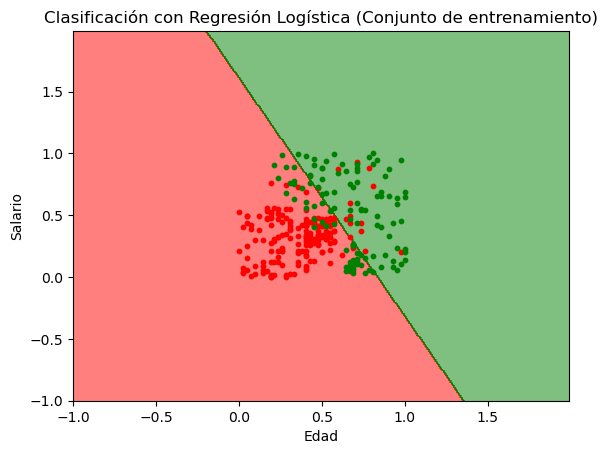

In [40]:
# 9. Visualizar los resultados
# 9.1 Conjunto de entramiento
from matplotlib.colors import ListedColormap as Colors
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, clasificador.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.5, cmap = Colors(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = Colors(('red', 'green'))(i), label = j, s=10)
plt.title('Clasificación con Regresión Logística (Conjunto de entrenamiento)')
plt.xlabel('Edad')
plt.ylabel('Salario')
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


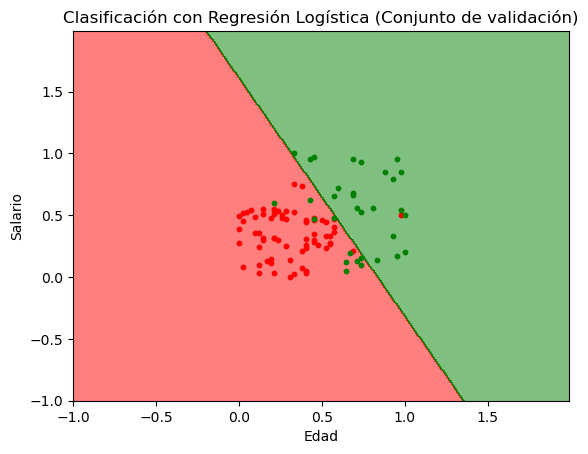

In [41]:
# 9.2 Conjunto de validación
from matplotlib.colors import ListedColormap as Colors
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, clasificador.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.5, cmap = Colors(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = Colors(('red', 'green'))(i), label = j, s=10)
plt.title('Clasificación con Regresión Logística (Conjunto de validación)')
plt.xlabel('Edad')
plt.ylabel('Salario')
plt.show()

# Conclusión
---
Hemos visto como la regresión logística establece una separación lineal en función de las probabilidades que tiene cada punto de pertenecer a una clase o a la otra.  

La línea de separación corresponde por tanto a aquellos puntos donde la probabilidad de pertenecer a cualquiera de las dos clases es del 50%.

In [54]:
# 10. Prueba del modelo

# Se definen los nuevos datos de una muestra
X_new = np.array([[24, 26000]])
X_new_esc = escaladorX.fit_transform(X_new.astype('float64'))

# Se usa clasificador.predict() para ver la predicción del modelo que se ha entrenado
prediccion_1 = clasificador.predict(X_new_esc)

if prediccion_1[0] == 1:
    prediccion_1_str = 'Compra'
else:
    prediccion_1_str = 'No Compra'

print(f"La predicción para una persona de {X_new[0][0]} años y con un salario de {X_new[0][1]} es: {prediccion_1_str}")

La predicción para una persona de 24 años y con un salario de 26000 es: No Compra


In [64]:
# Se definen los nuevos datos de una muestra
X_new_2 = np.array([[34, 20000]])
X_new_esc_2 = escaladorX.fit_transform(X_new_2.astype('float64'))

# Se usa clasificador.predict() para ver la predicción del modelo que se ha entrenado
prediccion_2 = clasificador.predict(X_new_esc_2)

if prediccion_2[0] == 1:
    prediccion_2_str = 'Compra'
else:
    prediccion_2_str = 'No Compra'

print(f"La predicción para una persona de {X_new_2[0][0]} años y con un salario de {X_new_2[0][1]} es: {prediccion_2_str}")

La predicción para una persona de 34 años y con un salario de 20000 es: No Compra
